In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv('Cleaned LMS Dataset.csv')

In [5]:
# Calculated PerformanceScore as mean of the 3 skill scores 
df['PerformanceScore'] = df[['SkillScore_Communication', 'SkillScore_TechEfficiency', 'SkillScore_Teamwork']].mean(axis=1)

# Calculated Training Frequency per Employee (number of trainings completed)
training_freq = df.groupby('EmployeeID').size().reset_index(name='Training_Frequency')

# Calculated total Training Time per Employee (sum of DurationMinutes)
training_time = df.groupby('EmployeeID')['DurationMinutes'].sum().reset_index()

# Calculated average PerformanceScore per Employee
performance = df.groupby('EmployeeID')['PerformanceScore'].mean().reset_index()

# Merged all metrics into one DataFrame for regression
reg_df = training_freq.merge(training_time, on='EmployeeID').merge(performance, on='EmployeeID')

# Preparing features and target variables
X = reg_df[['DurationMinutes', 'Training_Frequency']]
y = reg_df['PerformanceScore']

# Constant term for intercept
X = sm.add_constant(X)

# Fitting of OLS regression model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       PerformanceScore   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.042
Date:                Wed, 30 Jul 2025   Prob (F-statistic):              0.353
Time:                        11:38:26   Log-Likelihood:                -931.13
No. Observations:                 874   AIC:                             1868.
Df Residuals:                     871   BIC:                             1883.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0580      0

In [7]:
alpha = 0.05
if model.f_pvalue < alpha:
    print("The model is statistically significant.")
else:
    print("The model is NOT statistically significant (p =", round(model.f_pvalue, 4), ").")

The model is NOT statistically significant (p = 0.3532 ).


In [9]:
# Fitting the ANOVA model
model = ols('PerformanceScore ~ C(Team)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("ANOVA Results: Skill Score Comparison Across Teams")
print(anova_table)

ANOVA Results: Skill Score Comparison Across Teams
               sum_sq      df         F    PR(>F)
C(Team)      0.668249     5.0  0.195045  0.964491
Residual  1090.879589  1592.0       NaN       NaN


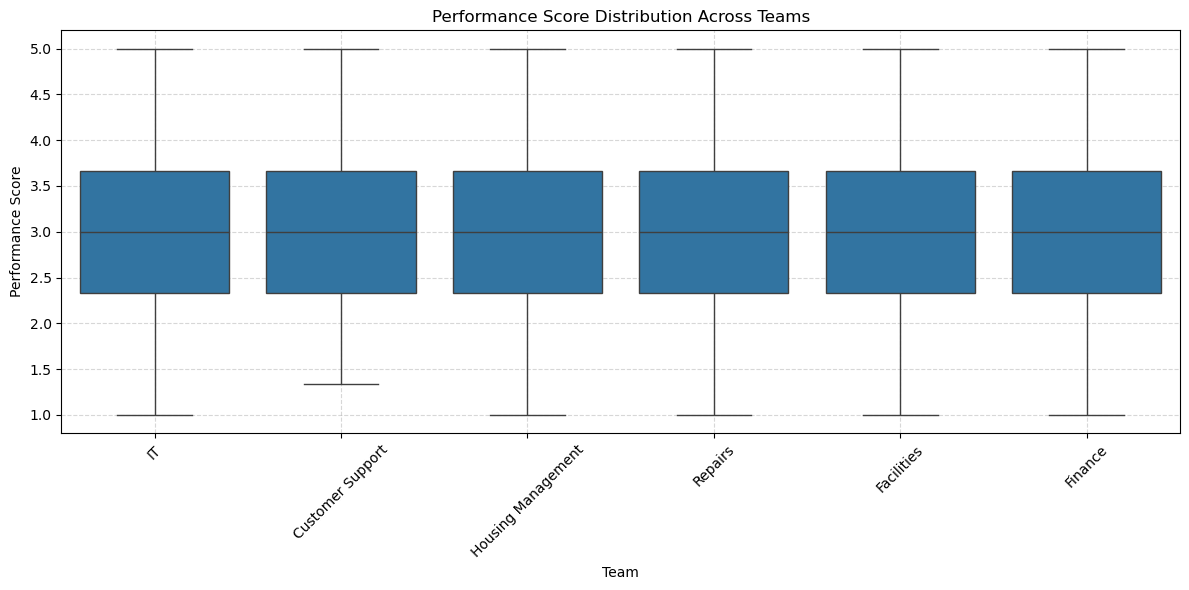

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Team', y='PerformanceScore')
plt.title("Performance Score Distribution Across Teams")
plt.xlabel("Team")
plt.ylabel("Performance Score")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [13]:
alpha = 0.05  # Confidence Level
p_value = anova_table['PR(>F)'][0]  #Extracting the p-value from the table

if p_value < alpha:
    conclusion = "Reject the null hypothesis: There is a significant difference in performance scores across teams."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant difference in performance scores across teams."

# Print conclusion
print("\nConclusion:")
print(conclusion)


Conclusion:
Fail to reject the null hypothesis: There is no significant difference in performance scores across teams.


C:\Users\Karunesh Sehgal\AppData\Local\Temp\ipykernel_29832\1364943684.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]  #Extracting the p-value from the table


### ANOVA Conclusion:

After performing the ANOVA test to compare the performance scores across different teams, the **p-value** obtained was `0.9644`, which is greater than the significance level of `0.05`. Therefore, we **fail to reject the null hypothesis**, implying there is **no statistically significant difference** in the performance scores across teams.

---

### Regression Analysis Conclusion:

Based on the regression analysis between **training time**, **frequency**, and **performance scores**, the results indicate:

- **Training Duration**: The **p-value** for training duration (`0.172`) is greater than `0.05`, suggesting that training duration does not have a **statistically significant impact** on performance scores.
  
- **Training Frequency**: The **p-value** for training frequency (`0.151`) is also greater than `0.05`, indicating that training frequency does not have a **statistically significant impact** on performance scores.

In conclusion, **neither training duration nor training frequency** has a statistically significant effect on performance scores based on the current data.

---

### Summary

- **ANOVA**: No significant difference in performance scores across teams.
- **Regression**: Neither training duration nor frequency significantly affects performance scores.
